HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

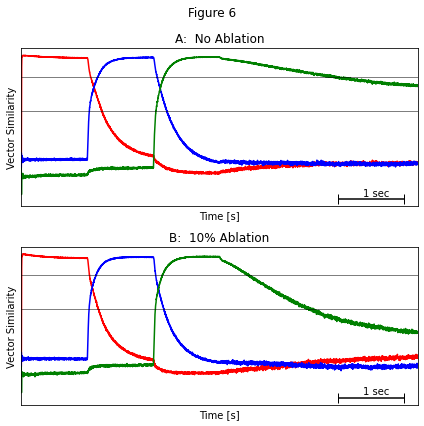

In [20]:
# July 4, 2021
# accuracy v speed
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
# with and without seed
import numpy as np
import random
import pickle
# Stewart change
# if decrease number neurons become less accurate?
d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.0005
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1
feedback = 0.99
threshold = 0.8 
import csv

with spa.Network(seed = 1) as model:
    noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
    vocab = spa.Vocabulary(d)
    vocab.populate("RED; BLUE; GREEN; NOISE")
    BLUE = vocab.parse('BLUE')
    RED = vocab.parse('RED')
    GREEN = vocab.parse('GREEN')
    NOISE = vocab.parse('NOISE')
    
    Color = spa.State(vocab,  subdimensions = 16, neurons_per_dimension = 50,\
                      represent_cc_identity = False, feedback_synapse = 0.1, feedback = feedback)
    nengo.Connection(noise,Color.input, synapse = 0.01)
        
    def input(t):
        if t < 1:
            return RED 
        elif t < 2:
            return BLUE 
        elif t < 3:
            return GREEN 
        else:
            return  '0'
    input_transcode = spa.Transcode(function = input, output_vocab = vocab)
    input_transcode >> Color
    probe_Color = nengo.Probe(Color.output, synapse = 0.01)

    def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000


    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(15.0)  
    
    numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers, open("June30", "wb"))
   
    #---------------------------------------------------------------------Plot No Ablation in Top Subplot
    fig, axs = plt.subplots(2, figsize=(6,6))
    fig.suptitle('Figure 6')
    axs[0].plot(figsize = [6, 3.5])
    xmin,xmax = 0,6
    ymin,ymax = 0.5, threshold + 0.1
    axs[0].plot(sim.trange(),numbers[:,0],'r-', label = 'RED')
    axs[0].plot(sim.trange(),numbers[:,1],'b-', label = 'BLUE')
    axs[0].plot(sim.trange(),numbers[:,2],'g-', label = 'GREEN')
    axs[0].set_title("A:  No Ablation" )
    axs[0].set_xlim(xmin,xmax)
    axs[0].set_xticks([])   # disable tick
    axs[0].set_yticks([])
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylabel("Vector Similarity")
    axs[0].errorbar( 5.3, -0.27, xerr=0.5, color='k', capsize=5)
    axs[0].text( 5.38, -0.17, '1 sec',  horizontalalignment='center', verticalalignment='top')
    xx_left = 0,0.5
    xx_right = 15.0, 0.5
    threshold_xx = [xx_left[0], xx_right[0]]
    threshold_yy = [xx_left[1], xx_right[1]]
    axs[0].plot(threshold_xx, threshold_yy, color = "black", linewidth = 0.5)
    axs[0].plot(threshold_x, threshold_y, color = "black", linewidth = 0.5)
    
    #---------------------------------------------------------------------Recalculate for 10% Ablation
    proportion_ablate = 0.1
    def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000


    with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
     
                sim.run(15.0)  
    
    numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                     
    pickle.dump(numbers, open("June30", "wb"))
    
    #---------------------------------------------------------------------Plot 10% Ablation in Lower Subplot
    axs[1].plot(figsize = [6, 3.5])
    xmin,xmax = 0,6
    ymin,ymax = 0.5, threshold + 0.1
    axs[1].plot(sim.trange(),numbers[:,0],'r-', label = 'RED')
    axs[1].plot(sim.trange(),numbers[:,1],'b-', label = 'BLUE')
    axs[1].plot(sim.trange(),numbers[:,2],'g-', label = 'GREEN')
    axs[1].set_title("B:  10% Ablation" )
    axs[1].set_xlim(xmin,xmax)
    axs[1].set_xticks([])   # disable tick
    axs[1].set_yticks([])
    axs[1].set_xlabel("Time [s]")
    axs[1].set_ylabel("Vector Similarity")
    xx_left = 0,0.5
    xx_right = 15.0, 0.5
    threshold_xx = [xx_left[0], xx_right[0]]
    threshold_yy = [xx_left[1], xx_right[1]]
    axs[1].plot(threshold_xx, threshold_yy, color = "black", linewidth = 0.5)
    axs[1].plot(threshold_x, threshold_y, color = "black", linewidth = 0.5)
    axs[1].errorbar( 5.3, -0.27, xerr=0.5, color='k', capsize=5)
    axs[1].text( 5.38, -0.17, '1 sec',  horizontalalignment='center', verticalalignment='top')
    
    fig.tight_layout()
    fig.savefig('Figure6.svg')  
    fig.savefig('Figure6.png') 
    
    